In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("play.csv")
df

,DAY,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cold,Normal,Weak,Yes
5,D6,Rain,Cold,Normal,Strong,No
6,D7,Overcast,Cold,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cold,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [6]:
x=df.iloc[:14,1:-1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# x[:,3]=le.fit_transform(x[:,3])

x[:,0] = le.fit_transform(x[:,0])
x

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]], dtype=object)

In [7]:
y=df.iloc[:,5].values
le1 = LabelEncoder()
y=le1.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_train

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.3764944 ,  0.83205029, -0.75592895, -1.09544512],
       [-1.3764944 , -0.69337525, -0.75592895,  0.91287093],
       [-0.11470787,  0.83205029, -0.75592895, -1.09544512],
       [-0.11470787,  0.83205029,  1.32287566,  0.91287093],
       [ 1.14707867, -0.69337525, -0.75592895, -1.09544512],
       [ 1.14707867,  0.83205029, -0.75592895,  0.91287093],
       [ 1.14707867,  0.83205029,  1.32287566, -1.09544512],
       [-0.11470787,  0.83205029, -0.75592895,  0.91287093],
       [ 1.14707867, -0.69337525, -0.75592895,  0.91287093],
       [-0.11470787, -2.21880078,  1.32287566, -1.09544512],
       [-1.3764944 , -0.69337525,  1.32287566,  0.91287093]])

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None)

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [2, 1]], dtype=int64)

In [41]:

print(x_train[:,0].shape)
print(y_train.shape)

from matplotlib.colors import ListedColormap 
x_set,y_set=x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
print("x1 du",x1.shape)
x2.shape

print("x1 ravel",x1.ravel().shape)
print("x2 ravel",x2.ravel().shape)
# print(classifier.predict)

print("idaa:",np.array([x1.ravel(),x2.ravel()]).T.shape)
# print("ivaga:",np.array([x1.ravel(),x2.ravel()]).T.reshape(x1.shape))
# print("predict",classifier.predict(np.array([x1.ravel(),x2.ravel()])))
# print(classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).shape)
print(classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape))

(11,)
(11,)
x1 du (506, 453)
x1 ravel (229218,)
x2 ravel (229218,)
idaa: (229218, 2)


ValueError: operands could not be broadcast together with shapes (229218,2) (4,) 

In [15]:
from matplotlib.colors import ListedColormap 
x_set,y_set=x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
            cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label=j)

ValueError: operands could not be broadcast together with shapes (229218,2) (4,) 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv("play.csv")
df

,DAY,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cold,Normal,Weak,Yes
5,D6,Rain,Cold,Normal,Strong,No
6,D7,Overcast,Cold,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cold,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [51]:
x = df.iloc[:,1:5].values
y = df.iloc[:,-1].values
print(x)
print(y)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cold' 'Normal' 'Weak']
 ['Rain' 'Cold' 'Normal' 'Strong']
 ['Overcast' 'Cold' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cold' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,3]=le.fit_transform(x[:,3])
y=le.fit_transform(y)
print(x)
print(y)

[[2 1 0 1]
 [2 1 0 0]
 [0 1 0 1]
 [1 2 0 1]
 [1 0 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [2 2 0 1]
 [2 0 1 1]
 [1 2 1 1]
 [2 2 1 0]
 [0 2 0 0]
 [0 1 1 1]
 [1 2 0 0]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_test

array([[1, 0, 1, 0],
       [2, 2, 1, 0],
       [0, 2, 0, 0]], dtype=object)

In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.14707867,  1.14707867, -0.91287093,  0.61237244],
       [-1.3764944 , -0.11470787,  1.09544512,  0.61237244],
       [ 1.14707867, -0.11470787, -0.91287093,  0.61237244],
       [-0.11470787,  1.14707867,  1.09544512,  0.61237244],
       [ 1.14707867, -1.3764944 ,  1.09544512,  0.61237244],
       [-0.11470787,  1.14707867, -0.91287093, -1.63299316],
       [-1.3764944 , -1.3764944 ,  1.09544512, -1.63299316],
       [-1.3764944 , -0.11470787, -0.91287093,  0.61237244],
       [-0.11470787,  1.14707867, -0.91287093,  0.61237244],
       [ 1.14707867, -0.11470787, -0.91287093, -1.63299316],
       [-0.11470787, -1.3764944 ,  1.09544512,  0.61237244]])

In [89]:
from sklearn.decomposition import PCA as p
ppp = p(n_components=2)
x_train = ppp.fit_transform(x_train)
x_test = ppp.transform(x_test)
x_train

array([[-1.76727077, -0.81211241],
       [ 1.41366665, -0.37277183],
       [-1.00613979, -0.73199964],
       [ 0.12200389, -0.80986571],
       [ 1.11373408, -1.00662128],
       [-1.32686017,  1.65685862],
       [ 2.08467645,  1.81933086],
       [ 0.05492376, -0.01803741],
       [-1.23673899, -0.4551313 ],
       [-1.09626096,  1.37999027],
       [ 1.64426585, -0.64964017]])

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
pred = dtc.predict(x_test)
pred

array([1, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[0, 1],
       [2, 0]], dtype=int64)

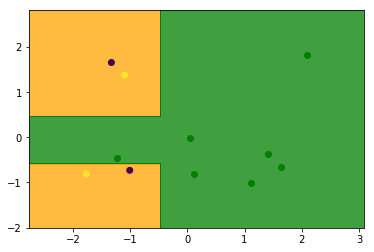

In [95]:
from matplotlib.colors import ListedColormap 
x_set,y_set=x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,dtc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
            cmap=ListedColormap(('orange','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label=j)